# Homework 3

## Question 1

In [1]:
import graphviz

import sys, os

os.environ["PATH"] = os.environ["PATH"] + ";" + r"C:\Program Files (x86)\Graphviz2.38\bin"

In [2]:
g = graphviz.Digraph()
g.node("U")
g.node("X")
g.node("W")
g.node("Y")

g.edge("X", "W")
g.edge("X", "Y")
g.edge("U", "Y")
g.edge("U", "W")

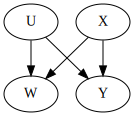

In [3]:
g

### 1.1.a
The empty set $\emptyset$ is a valid adjustment set becuase $X$ has no parents and the only indirect path from $X$ to $Y$, namely $X \rightarrow W \rightarrow U \rightarrow Y$ is blocked when $W$ as the collider is not conditioned on. 

 ### 1.1.b
 If we adjusted for $W$, then the collider in $X \rightarrow W \rightarrow U \rightarrow Y$ would be open and so the indirect path would have an influence.

### 1.1.c
Since we conditioned on $W$, th ecollider in $X \rightarrow W \rightarrow U \rightarrow Y$  is opened and we have to block it. Therefore the valid adjustment set becomes $\{U\}$.

$P(Y = y | do(X=x), W = high) = \sum_{u}{P(Y=y | X=x, W=high, U=u)P(U=u | W=high)}$

## 1.2

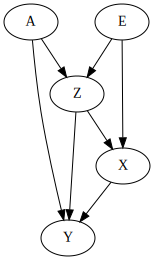

In [4]:
g2 = graphviz.Digraph()
g2.node("A")
g2.node("E")
g2.node("Z")
g2.node("Y")
g2.node("X")


g2.edge("A", "Z")
g2.edge("A", "Y")

g2.edge("E", "Z")
g2.edge("E", "X")
g2.edge("Z", "X")
g2.edge("Z", "Y")

g2.edge("X", "Y")
g2

### 1.2.a
$\{Z\}$ is not a valid adjustment set because conditioning on $Z$ would open the collider between $A$ an $E$, i.e.  the backdoor path $X \leftarrow E \rightarrow Z \leftarrow A \rightarrow Y$ would be opened.

### 1.2.b

1. $\{Z, E\}$: $P(Y = y | do(X = x)) = \sum_{z, e} P(Y=y|X=x, Z=z, E=e)P(Z=z, E=e)$
2. $\{Z, A\}$: $P(Y = y | do(X = x)) = \sum_{z, a} P(Y=y|X=x, Z=z, A=a)P(Z=z, A=a)$
3. $\{Z, A, E\}$: $P(Y = y | do(X = x)) = \sum_{z, a, e} P(Y=y|X=x, Z=z, A=a, E=e)P(Z=z, A=a, E=e)$

### 1.2.c
$\{A, Z\}$

## 1.3


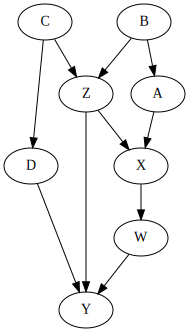

In [5]:
g3 = graphviz.Digraph()
g3.node("C")
g3.node("B")
g3.node("Z")
g3.node("D")
g3.node("A")
g3.node("X")
g3.node("W")
g3.node("Y")


g3.edge("C", "Z")
g3.edge("B", "Z")
g3.edge("B", "A")
g3.edge("A", "X")
g3.edge("Z", "X")
g3.edge("X", "W")
g3.edge("Z", "Y")
g3.edge("W", "Y")
g3.edge("C", "D")
g3.edge("D", "Y")
g3

### 1.3.a
$\{Z, A\}, \{Z, B \}, \{Z, C\}, \{Z, D\}$, 
$\{Z, A, B\}, \{Z, A, C\}, \{Z, A, D\}$,
$\{Z, B, C\}, \{Z, B, D\}$, 
$\{Z, C, D\}$ 

In [6]:
valid_sets = []


for a in (True, False):
    for b in (True, False):
        for c in (True, False):
            for d in (True, False):
                newset = {"Z"}
                if a:
                    newset.add("A")
                if b:
                    newset.add("B")
                if c:
                    newset.add("C")
                if d:
                    newset.add("D")
                if not newset in valid_sets:
                    valid_sets.append(newset)

In [7]:
valid_sets = [vs for vs in valid_sets if len(vs) >= 2]

In [8]:
valid_sets

[{'A', 'B', 'C', 'D', 'Z'},
 {'A', 'B', 'C', 'Z'},
 {'A', 'B', 'D', 'Z'},
 {'A', 'B', 'Z'},
 {'A', 'C', 'D', 'Z'},
 {'A', 'C', 'Z'},
 {'A', 'D', 'Z'},
 {'A', 'Z'},
 {'B', 'C', 'D', 'Z'},
 {'B', 'C', 'Z'},
 {'B', 'D', 'Z'},
 {'B', 'Z'},
 {'C', 'D', 'Z'},
 {'C', 'Z'},
 {'D', 'Z'}]

### 1.3.b

{Z, A}, {Z, B}, {Z, C}, {Z, D}

### 1.3.c

{C}, {Z, B}, {Z, A}, {Z, X}, {Z, W}

### 1.3.d

{C, X}, {Z}

# Question 2: covariate adjustment

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch

import pyro
import pyro.infer
import pyro.optim
import pyro.distributions as dist
from itertools import product

## 2.1

In [10]:
df_2_1 = pd.DataFrame([
    {"Y": 0, "X": 0, "Z": 0, "num": 8769 - 8173},
    {"Y": 1, "X": 0, "Z": 0, "num": 8173},
    
    {"Y": 0, "X": 0, "Z": 1, "num": 26231 - 19228},
    {"Y": 1, "X": 0, "Z": 1, "num": 19228},
    
    {"Y": 0, "X": 1, "Z": 0, "num": 26872 - 23339},
    {"Y": 1, "X": 1, "Z": 0, "num": 23339},
    
    {"Y": 0, "X": 1, "Z": 1, "num": 8128 - 5582},
    {"Y": 1, "X": 1, "Z": 1, "num": 5582}
])
df_2_1

,Y,X,Z,num
0,0,0,0,596
1,1,0,0,8173
2,0,0,1,7003
3,1,0,1,19228
4,0,1,0,3533
5,1,1,0,23339
6,0,1,1,2546
7,1,1,1,5582


In [11]:
df_2_1.index=[df_2_1.X, df_2_1.Z, df_2_1.Y]

In [12]:
nums = pd.Series(df_2_1.num, index=[df_2_1.X, df_2_1.Z, df_2_1.Y])

In [13]:
nums

X  Z  Y
0  0  0      596
      1     8173
   1  0     7003
      1    19228
1  0  0     3533
      1    23339
   1  0     2546
      1     5582
Name: num, dtype: int64

### 2.1.a

In [14]:
def model_2_1():
    Z = pyro.sample("Z", dist.Categorical(torch.tensor([nums.loc[:,0,:].sum() / nums.sum(), 
                                                        nums.loc[:,1,:].sum() / nums.sum()])))
    prob_X = torch.tensor([
        # Z = 0
        [nums.loc[0,0,:].sum() / nums.loc[:,0,:].sum(), nums.loc[1,0,:].sum() / nums.loc[:,0,:].sum()],
        # Z = 1
        [nums.loc[0,1,:].sum() / nums.loc[:,1,:].sum(), nums.loc[1,1,:].sum() / nums.loc[:,1,:].sum()]
    ])
    X = pyro.sample("X", dist.Categorical(prob_X[Z]))
    
    prob_Y = torch.tensor([
        # X = 0
        [ 
            # Z = 0
            [nums.loc[0,0,0] / nums.loc[0,0,:].sum(), nums.loc[0,0,1] / nums.loc[0,0,:].sum()],
            # Z = 1
            [nums.loc[0,1,0] / nums.loc[0,1,:].sum(), nums.loc[0,1,1] / nums.loc[0,1,:].sum()]
        ],
        # X = 1
        [
            # Z = 0
            [nums.loc[1,0,0] / nums.loc[1,0,:].sum(), nums.loc[1,0,1] / nums.loc[1,0,:].sum()],
            # Z = 1
            [nums.loc[1,1,0] / nums.loc[1,1,:].sum(), nums.loc[1,1,1] / nums.loc[1,1,:].sum()]
        ]
    ])
    Y = pyro.sample("Y", dist.Categorical(prob_Y[X, Z]))

In [15]:
imp_m_2_1 = pyro.infer.Importance(
    model=model_2_1, num_samples=1000)

In [16]:
inf_m_2_1 = imp_m_2_1.run()

In [17]:
p_z_0 = torch.exp(inf_m_2_1.marginal(["Z"]).empirical["Z"].log_prob(torch.tensor(0)))
p_z_1= torch.exp(inf_m_2_1.marginal(["Z"]).empirical["Z"].log_prob(torch.tensor(1)))

In [18]:
c_models_2_1 = [
    [pyro.condition(model_2_1, data={"X": torch.tensor(x), "Z": torch.tensor(z)}) for z in (0, 1)]
    for x in (0, 1)
]

In [19]:
NUM_SAMPLES = 1000

imp_c_models_2_1 = [
    [pyro.infer.Importance(model=c_models_2_1[x][z], num_samples=NUM_SAMPLES) for z in (0, 1)]
    for x in (0, 1)
]

In [20]:
def _inference(x, z):
    print(f"Inference: X={x}, Z={z}")
    return imp_c_models_2_1[x][z].run()

inf_c_models_2_1 = [[_inference(x, z) for z in (0, 1)] for x in (0, 1)]
    

Inference: X=0, Z=0
Inference: X=0, Z=1
Inference: X=1, Z=0
Inference: X=1, Z=1


In [21]:
def prob_y(_inf, _val):
    return torch.exp(_inf.marginal(["Y"]).empirical["Y"].log_prob(_val))

In [22]:
p_y1_x1_cond = prob_y(inf_c_models_2_1[1][0], 1) * p_z_0 + prob_y(inf_c_models_2_1[1][1], 1) * p_z_1

In [23]:
p_y1_x0_cond = prob_y(inf_c_models_2_1[0][0], 1) * p_z_0 + prob_y(inf_c_models_2_1[0][1], 1) * p_z_1

In [24]:
ace_cond = p_y1_x0_cond - p_y1_x1_cond
print(p_y1_x0_cond, p_y1_x1_cond)
print(f"average causal effect (conditioning): {ace_cond}")

tensor(0.8326) tensor(0.7822)
average causal effect (conditioning): 0.050391972064971924


### 2.1.b

In [25]:
do_models_2_1 = [pyro.do(model_2_1, data={"X": torch.tensor(x)}) for x in (0, 1)]

In [26]:
imp_do_models_2_1 = [pyro.infer.Importance(model=do_models_2_1[x], num_samples=NUM_SAMPLES) for x in (0, 1)]

In [27]:
def _inference_do(x):
    print(f"Inference DO: X={x}")
    return imp_do_models_2_1[x].run()

inf_do_models_2_1 = [_inference_do(x) for x in (0, 1)]

Inference DO: X=0
Inference DO: X=1


In [28]:
p_y1_x0_do = prob_y(inf_do_models_2_1[0], 1)

In [29]:
p_y1_x1_do = prob_y(inf_do_models_2_1[1], 1)

In [30]:
ace_do = p_y1_x0_do - p_y1_x1_do
print(p_y1_x0_do, p_y1_x1_do)
print(f"average causal effect (do): {ace_do}")

tensor(0.8250) tensor(0.7900)
average causal effect (do): 0.034999966621398926


## 2.2

### 2.2.a

In [31]:
NUM_SAMPLES = 10000

In [32]:
def model_2_2():
    X = pyro.sample("X", dist.Categorical(torch.tensor([0.5, 0.5])))
    prob_Z = torch.tensor([
        # X = 0
        [380 / 400, 20 / 400],
        # X = 1
        [20 / 400, 380 / 400]
    ])
    Z = pyro.sample("Z", dist.Categorical(prob_Z[X]))
    prob_Y = torch.tensor([
        # Z = 0
        [56 / 400, 344 / 400],
        # Z = 1
        [324 / 400, 76 / 400]
    ])
    Y = pyro.sample("Y", dist.Categorical(prob_Y[Z]))
    
        

In [33]:
cond_2_2_z_on_x = [pyro.condition(model_2_2, data={"X": torch.tensor(x)}) for x in (0, 1)]

imp_2_2_z_on_x = [pyro.infer.Importance(model=cond_2_2_z_on_x[x], num_samples=NUM_SAMPLES) for x in (0, 1)]

def _inference_2_2_z_on_x(x):
    print(f"Inference: X={x}")
    return imp_2_2_z_on_x[x].run()

inf_2_2_z_on_x = [_inference_2_2_z_on_x(x) for x in (0, 1)]

Inference: X=0
Inference: X=1


In [34]:
cond_2_2_y_on_x_z = [
    [pyro.condition(model_2_2, data={"X": torch.tensor(x), "Z": torch.tensor(z)}) for z in (0, 1)]
    for x in (0, 1)]

imp_2_2_y_on_x_z = [
    [pyro.infer.Importance(model=cond_2_2_y_on_x_z[x][z], num_samples=NUM_SAMPLES) for z in (0, 1)]
    for x in (0, 1)
]

def _inference_2_2_y_on_x_z(x, z):
    print(f"Inference: X={x}, Z={z}")
    return imp_2_2_y_on_x_z[x][z].run()

inf_2_2_y_on_x_z = [[_inference_2_2_y_on_x_z(x, z) for z in (0, 1)] for x in (0, 1)]

Inference: X=0, Z=0
Inference: X=0, Z=1
Inference: X=1, Z=0
Inference: X=1, Z=1


In [35]:
imp_2_2 = pyro.infer.Importance(model=model_2_2, num_samples=NUM_SAMPLES)

inf_2_2 = imp_2_2.run()

In [36]:
def prob(_inf, _var, _val):
    return torch.exp(_inf.marginal([_var]).empirical[_var].log_prob(_val))

In [37]:
p_y1_do_x0 = torch.tensor([prob(inf_2_2_z_on_x[0], "Z", z) * 
              torch.tensor([prob(inf_2_2_y_on_x_z[x][z], "Y", 1) * prob(inf_2_2, "X", x) for x in (0, 1)]).sum()
              for z in (0, 1)]).sum()

In [38]:
p_y1_do_x0

tensor(0.8233)

In [39]:
p_y1_do_x1 = torch.tensor([prob(inf_2_2_z_on_x[1], "Z", z) * 
              torch.tensor([prob(inf_2_2_y_on_x_z[x][z], "Y", 1) * prob(inf_2_2, "X", x) for x in (0, 1)]).sum()
              for z in (0, 1)]).sum()

In [40]:
p_y1_do_x1

tensor(0.2212)

In [41]:
ace_2_2 = p_y1_do_x0 - p_y1_do_x1

In [42]:
ace_2_2

tensor(0.6020)

### 2.2.b

In [43]:
do_2_2_y1_do_x0 = pyro.do(model_2_2, data={"X": torch.tensor(0)})
do_2_2_y1_do_x1 = pyro.do(model_2_2, data={"X": torch.tensor(1)})

imp_do_2_2_y1_do_x0 = pyro.infer.Importance(model=do_2_2_y1_do_x0, num_samples=NUM_SAMPLES)
imp_do_2_2_y1_do_x1 = pyro.infer.Importance(model=do_2_2_y1_do_x1, num_samples=NUM_SAMPLES)

In [44]:
inf_do_2_2_y1_do_x0 = imp_do_2_2_y1_do_x0.run()
inf_do_2_2_y1_do_x1 = imp_do_2_2_y1_do_x1.run()

In [45]:
prob(inf_do_2_2_y1_do_x0, "Y", 1) - prob(inf_do_2_2_y1_do_x1, "Y", 1)

tensor(0.6105)

In [ ]:
version